# Cryptocurrency Market Exploration by Ayan Karim

## Description of Data

The chosen dataset was found on Kaggle (uploaded by jvent). It contains historic data on all cryptocurrencies. It consists of 13 columns labeled slug (coin’s name), symbol, name (seems redundant), date, ranknow (coin rank), open, high, low, close, volume, market, close ratio and spread. The open, high, low and close are values of the coin in US dollars at those particular instances, for that date. It’s worth noting that the actual cryptocurrency market is always open, but the “open” and “close” times refer to the time frame for which the global market is the most active. The “market” column refers to the coin's Market Capitalization (market cap) value in US dollars for that date, which is basically the measure of a coin's value (also the measure of value for stocks). More specifically, it's defined as the product of a coin’s stock share and stock price, or in other words, the product of the circulating supply of tokens by their current price. The “spread” is the difference between the high and low value, and the “close rate” is the ratio of the close value subtracted by the low value and the high value subtracted by the low value.

$Close Rate=(close-low)/(high-low)$

The dataset unfortunately doesn’t encompass all historic data since each coin’s creation. Furthermore, different coins have data beginning on different dates, for example Bitcoin has data since 2013, but Bitcoin Cash only has data since 2017. So, for the purpose of our investigation, we’ll focus on the data for 2018.

This dataset is significant particularly in lieu of the recent craze surrounding what seemed like Bitcoin’s exponential growth. Bitcoin’s value has since dropped to a stable value and leveled off, but the event caught the attention of just about everyone and cryptocurrencies have since become much an increasingly popular topic. However, cryptocurrencies have been around since the creation of Bitcoin in 2009, so there’s a decent amount of historic data on coin activity. Since it’s become so popular, and more individuals look to invest in such a market, it’s worthwhile to investigate the Crypto market so we can have a better understanding of how the market behaves and what the future may entail.

In [1]:
# Crypto Currency descriptive statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('crypto-markets.csv')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d', utc=True)

## Analytic Question

**_1.	The dataset gives us a ranking of each cryptocurrency; what characteristics are common or consistent amongst top ranked cryptocurrencies?_**

In [14]:
crp_market = df[(['date', 'ranknow', 'name', 'market', 'volume'])]
crp_market = crp_market[(crp_market['date']>='2018-01-01')&(crp_market['ranknow']<=40)]
crp_market = crp_market[(['name', 'market', 'volume'])]
crp_market = crp_market.groupby('name', sort=False).mean()
crp_market

,market,volume
name,,
Bitcoin,1.622820e+11,8.046107e+09
Ethereum,7.406245e+10,2.893666e+09
Ripple,3.889269e+10,1.266534e+09
Bitcoin Cash,2.268930e+10,8.128522e+08
EOS,7.922506e+09,1.048327e+09
Litecoin,9.323648e+09,6.328960e+08
Stellar,6.902536e+09,1.500358e+08
Cardano,9.472029e+09,3.019284e+08
IOTA,5.490732e+09,8.645265e+07


The table above shows the mean market capitalization values and volume for each of the top 40 ranked cryptocurrencies in order. Bitcoin's values lead with a market cap of 1.62e+11 and volume of 8.05e+09, which are more than twice as great as second place (Ethereum with 7.41e+09 and 2.89e+09 respectively). The values then seem to decrease as we go down the ranks.

There are a few outliers in the values as we go down the rows. We can visualize them more carefully in a bar plot.

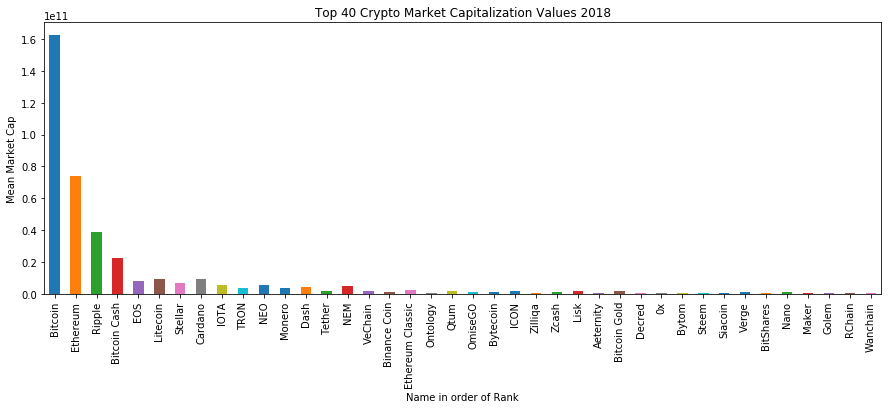

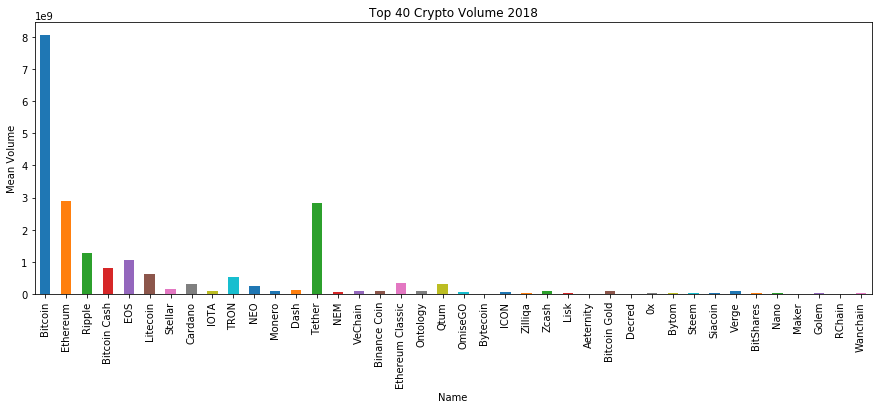

In [4]:
crp_market = df[(['date', 'ranknow', 'name', 'market'])]
crp_market = crp_market[crp_market['date']>='2018-01-01']
crp_market = crp_market.groupby('name').mean()
crp_market = crp_market.sort_values('ranknow')
crp_market = crp_market['market']

ax = crp_market.head(40).plot(kind='bar', title='Top 40 Crypto Market Capitalization Values 2018', figsize=(15,5))
ax.set_xlabel("Name in order of Rank")
plt.xticks(rotation='vertical')
ax.set_ylabel("Mean Market Cap")
plt.show()

crp_volume = df[(['date', 'ranknow', 'name', 'volume'])]
crp_volume = crp_volume[crp_volume['date']>='2018-01-01']
crp_volume = crp_volume.groupby('name').mean()
crp_volume = crp_volume.sort_values('ranknow')
crp_volume = crp_volume['volume']

ax = crp_volume.head(40).plot(kind='bar', title='Top 40 Crypto Volume 2018', figsize=(15,5))
ax.set_xlabel("Name")
plt.xticks(rotation='vertical')
ax.set_ylabel("Mean Volume")
plt.show()

The first bar plot above describes the mean market capitalization value of the top 40 ranked cryptocurrencies in our data set. The top 40 ranked coins are on the x-axis in order from 1st place on the left to 40th on the right, and the mean market cap values are placed on the y-axis. As one would expect, we see a positive skew shape showing that the higher the rank of the coin, the higher its mean market cap value. However, if we look closely, certain coins seem to have low market cap values given their rank. For example, EOS (7.92e+09) has a lower mean value than the subsequently ranked Litecoin (9.32e+09) and there are a couple more examples of that as we move right through the ranks.

If we compare their mean volume in the second bar plot, we observe a similar downward shape from left to right. But there are still many coins whose values are low for their rank. Since their value is based on the product of their price and volume, and this graph only shows their mean volume, the coins may have been ranked from a combination of these different factors. Here EOS (1.04e+09) has a greater mean volume than the subsequent Litecoin (6.32e+08). So it's higher rank is probably attributed to its larger circulation of supply.

We see an outlier at Tether (2.83e+09), who's mean volume seems to be far greater than all other coins except Bitcoin and Ethereum.

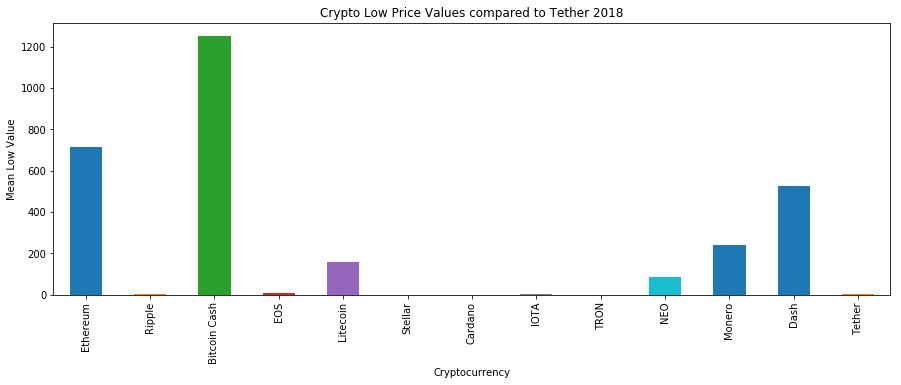

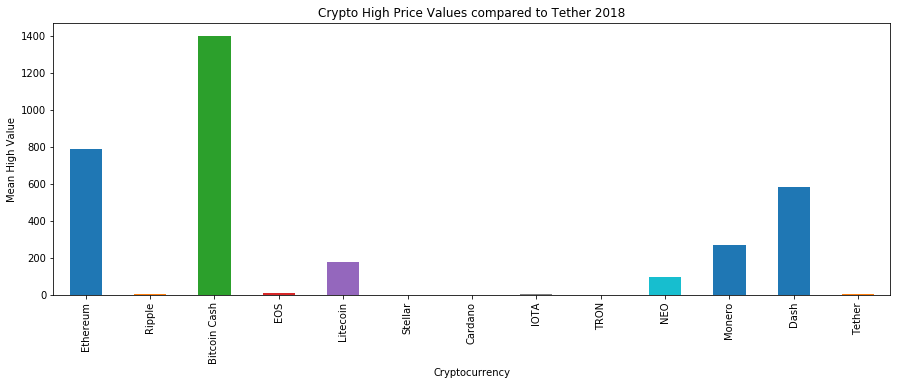

In [5]:
crp_low = df[(df['ranknow']>1)&(df['ranknow']<15)]
crp_low = crp_low[crp_low['date']>='2018-01-01']
crp_low = crp_low.groupby('name').mean()
crp_low = crp_low.sort_values('ranknow')
crp_low = crp_low['low']

ax = crp_low.plot(kind='bar', title='Crypto Low Price Values compared to Tether 2018', figsize=(15,5))
ax.set_xlabel("Cryptocurrency")
ax.set_ylabel("Mean Low Value")
plt.show()

crp_low = df[(df['ranknow']>1)&(df['ranknow']<15)]
crp_low = crp_low[crp_low['date']>='2018-01-01']
crp_low = crp_low.groupby('name').mean()
crp_low = crp_low.sort_values('ranknow')
crp_low = crp_low['high']

ax = crp_low.plot(kind='bar', title='Crypto High Price Values compared to Tether 2018', figsize=(15,5))
ax.set_xlabel("Cryptocurrency")
ax.set_ylabel("Mean High Value")
plt.show()

The two bar plots above compare the mean Low and High values of Tether, to that of those coins ranked above it. For the sake of a clearer comparison, we've omitted Bitcoin since its incredibly high value makes it difficult to observe the other coins. Tether’s mean Low and high Values is much lower than most of the coins ranked above it. So, Tether’s incredibly high volume is offset by its low-price value. However, other coins like Stellar, Cardano and TRON also have incredibly low values in both the graphs. But they have smaller mean volume than Tether as well. So, there must be another factor that decided their rank.

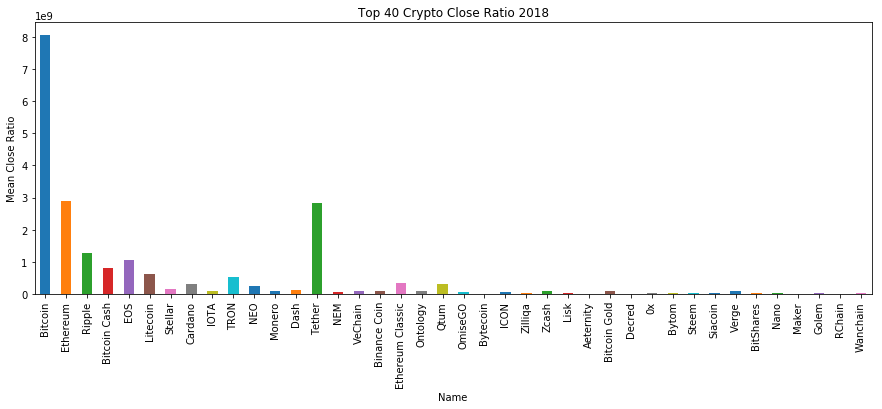

In [6]:
crp_closerate = df[(['date', 'ranknow', 'name', 'close_ratio'])]
crp_closerate = crp_closerate[crp_closerate['date']>='2018-01-01']
crp_closerate = crp_closerate.groupby('name').mean()
crp_closerate = crp_closerate.sort_values('ranknow')
crp_closerate = crp_closerate['close_ratio']

ax = crp_volume.head(40).plot(kind='bar', title='Top 40 Crypto Close Ratio 2018', figsize=(15,5))
ax.set_xlabel("Name")
plt.xticks(rotation='vertical')
ax.set_ylabel("Mean Close Ratio")
plt.show()

One final factor we can look at to characterize the performance or ranks of crypto currencies are their close ratios. As mentioned in the __Description of Data section__, the close ratio, also known as the daily close rate, refers to the quotient of the close value minus the low value and the high value minus the low value. 

From this graph we observe the same pattern that we've seen from the Market Capitalization and Volume graphs in which the higher ranked coins have greater values. But like the previous graphs, the rank is not ordered solely based on this factor. Once again, we see that Tether has an incredibly high value compared to its counterparts.

We can conclude that the performance, or rank of a cryptocurrency is based on the combination of its Market Cap Value (which directly relates to volume and price) and its Close Ratio.

## Analytic Question

**_2.	Given the recent popularity in cryptocurrency, what do the trends of top ranked coins look like since the start of 2018 and how stable are their values?_**

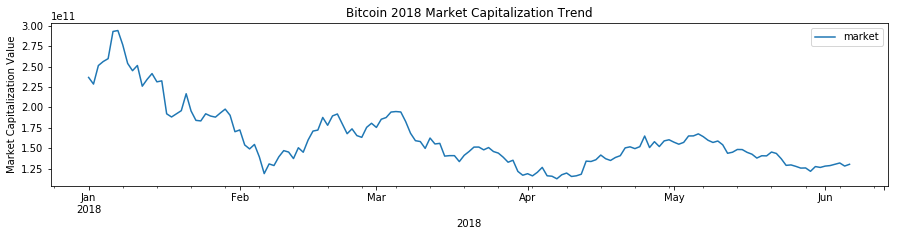

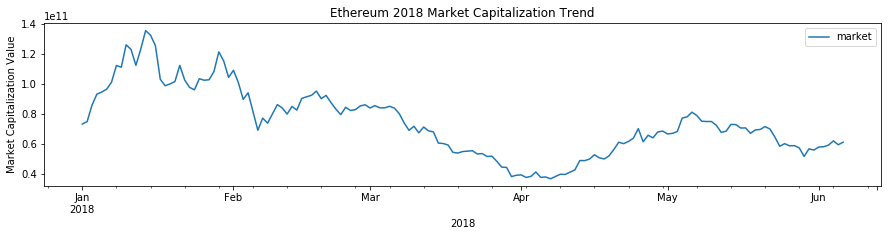

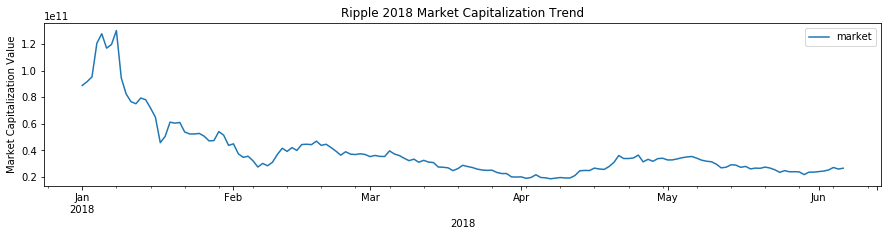

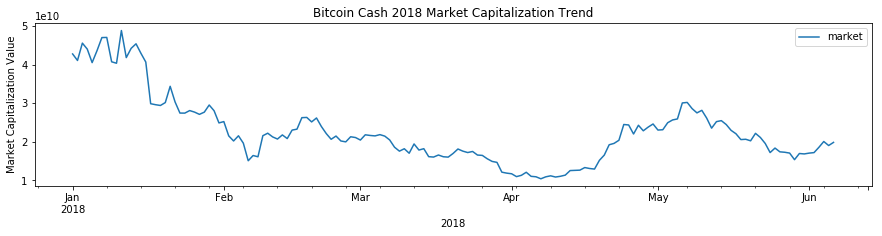

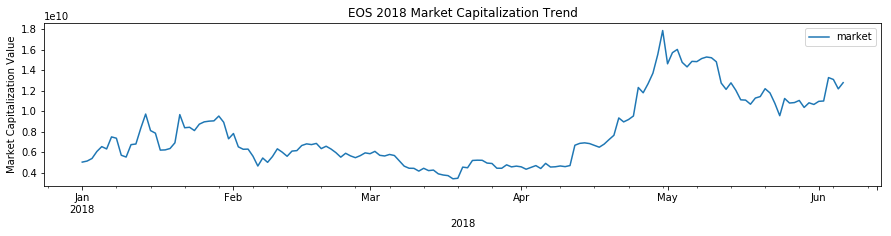

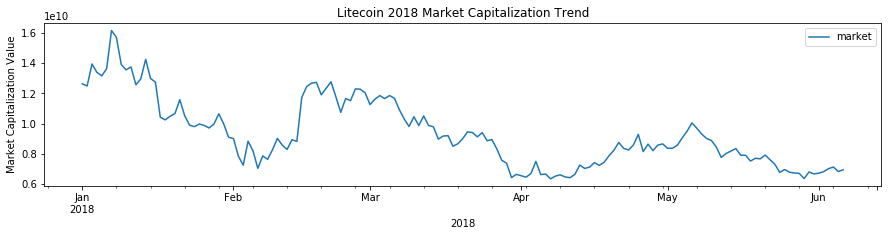

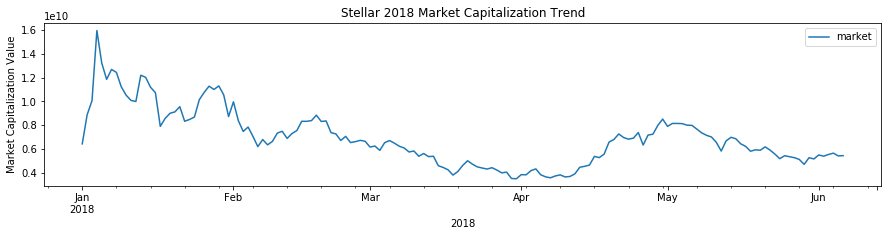

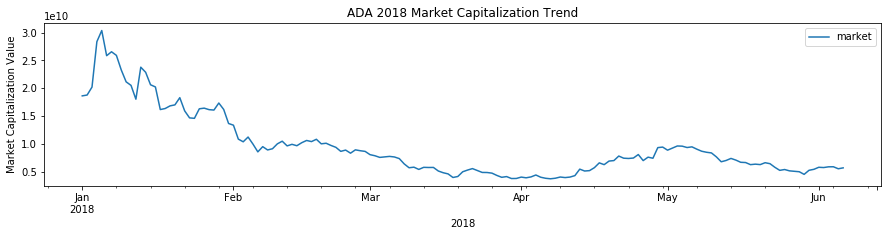

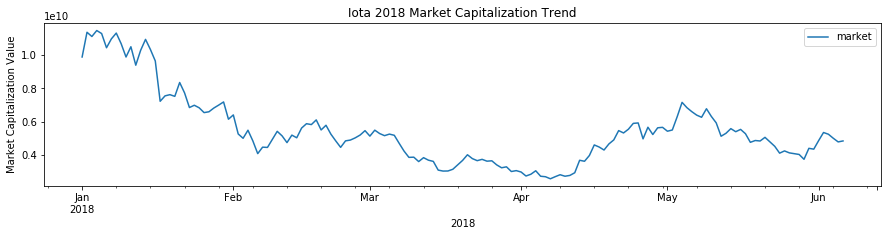

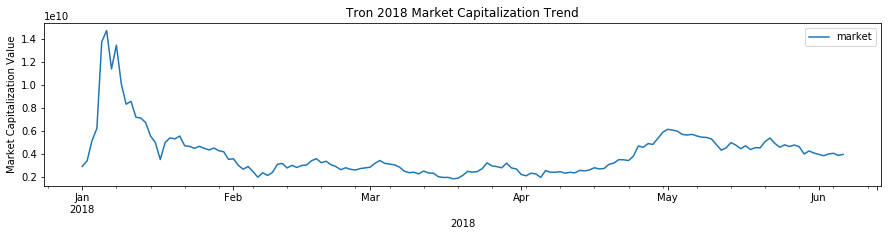

In [7]:
crpBTC = df[df['ranknow']==1]
crpBTC = crpBTC[(['date', 'market'])]
crpBTC = crpBTC[crpBTC['date']>='2018-01-01']
crpBTC = crpBTC.set_index('date')
bx = crpBTC.plot(figsize=(15,3), title='Bitcoin 2018 Market Capitalization Trend')
bx.set_xlabel('2018')
bx.set_ylabel('Market Capitalization Value')
plt.show()

crpETH = df[df['ranknow']==2]
crpETH = crpETH[(['date', 'market'])]
crpETH = crpETH[crpETH['date']>='2018-01-01']
crpETH = crpETH.set_index('date')
ax = crpETH.plot(figsize=(15,3), title='Ethereum 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpXRP = df[df['ranknow']==3]
crpXRP = crpXRP[(['date', 'market'])]
crpXRP = crpXRP[crpXRP['date']>='2018-01-01']
crpXRP = crpXRP.set_index('date')
ax = crpXRP.plot(figsize=(15,3), title='Ripple 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpBCH = df[df['ranknow']==4]
crpBCH = crpBCH[(['date', 'market'])]
crpBCH = crpBCH[crpBCH['date']>='2018-01-01']
crpBCH = crpBCH.set_index('date')
ax = crpBCH.plot(figsize=(15,3), title='Bitcoin Cash 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpEOS = df[df['ranknow']==5]
crpEOS = crpEOS[(['date', 'market'])]
crpEOS = crpEOS[crpEOS['date']>='2018-01-01']
crpEOS = crpEOS.set_index('date')
ax = crpEOS.plot(figsize=(15,3), title='EOS 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpLTC = df[df['ranknow']==6]
crpLTC = crpLTC[(['date', 'market'])]
crpLTC = crpLTC[crpLTC['date']>='2018-01-01']
crpLTC = crpLTC.set_index('date')
ax = crpLTC.plot(figsize=(15,3), title='Litecoin 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpXLM = df[df['ranknow']==7]
crpXLM = crpXLM[(['date', 'market'])]
crpXLM = crpXLM[crpXLM['date']>='2018-01-01']
crpXLM = crpXLM.set_index('date')
ax = crpXLM.plot(figsize=(15,3), title='Stellar 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpADA = df[df['ranknow']==8]
crpADA = crpADA[(['date', 'market'])]
crpADA = crpADA[crpADA['date']>='2018-01-01']
crpADA = crpADA.set_index('date')
ax = crpADA.plot(figsize=(15,3), title='ADA 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpMIOTA = df[df['ranknow']==9]
crpMIOTA = crpMIOTA[(['date', 'market'])]
crpMIOTA = crpMIOTA[crpMIOTA['date']>='2018-01-01']
crpMIOTA = crpMIOTA.set_index('date')
ax = crpMIOTA.plot(figsize=(15,3), title='Iota 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

crpTRX = df[df['ranknow']==10]
crpTRX = crpTRX[(['date', 'market'])]
crpTRX = crpTRX[crpTRX['date']>='2018-01-01']
crpTRX = crpTRX.set_index('date')
ax = crpTRX.plot(figsize=(15,3), title='Tron 2018 Market Capitalization Trend')
ax.set_xlabel('2018')
ax.set_ylabel('Market Capitalization Value')
plt.show()

The line plots above show the trend of the market cap value of each of the top 10 coins in 2018, between January 1st and June 6th. Each data point in the line plots are the market cap values for each day, so the line plots show the trend from day to day. Based on the visualizations, Bitcoin has seen an overall negative trend this year as its value decreased. This is interesting because it follows after its value skyrocketed in 2017. And despite having an overall decrease in value, we also observe a lot of variability in its trend as it tends to increase and decrease drastically each day. We see that its value fell very low in the beginning of February, but then rose again in March, only to decrease again in April.

Ripple and ADA also show a very clear negative trend. The other coins, however, show too much variability to determine whether the trend is negative and so makes it difficult to predict whether the trend will continue.

In [8]:
crp_market = df[(['date', 'ranknow', 'name', 'market'])]
crp_market = crp_market[(crp_market['date']>='2018-01-01')&(crp_market['ranknow']<=10)]
crp_market = crp_market[(['name', 'market'])]
crp_market = crp_market.groupby('name', sort=False).describe()
crp_market

market                                                          \
              count          mean           std           min           25%   
name                                                                          
Bitcoin       157.0  1.622820e+11  3.785181e+10  1.124670e+11  1.370700e+11   
Ethereum      157.0  7.406245e+10  2.246677e+10  3.654190e+10  5.793290e+10   
Ripple        157.0  3.889269e+10  2.198853e+10  1.864230e+10  2.601230e+10   
Bitcoin Cash  157.0  2.268930e+10  8.733062e+09  1.042660e+10  1.705430e+10   
EOS           157.0  7.922506e+09  3.401330e+09  3.417960e+09  5.227640e+09   
Litecoin      157.0  9.323648e+09  2.228465e+09  6.332130e+09  7.563030e+09   
Stellar       157.0  6.902536e+09  2.329067e+09  3.506780e+09  5.361600e+09   
Cardano       157.0  9.472029e+09  5.725870e+09  3.756440e+09  5.487000e+09   
IOTA          157.0  5.490732e+09  2.120012e+09  2.600120e+09  4.054940e+09   
TRON          157.0  4.045340e+09  2.091440e+09  1.859720e+09  2.697960e+09   

                                                        
                       50%           75%           max  
name                                                    
Bitcoin       1.516510e+11  1.805100e+11  2.942220e+11  
Ethereum      7.108600e+10  8.605560e+10  1.355030e+11  
Ripple        3.263890e+10  4.211980e+10  1.303020e+11  
Bitcoin Cash  2.114640e+10  2.595140e+10  4.888080e+10  
EOS           6.667990e+09  1.067640e+10  1.784910e+10  
Litecoin      8.872740e+09  1.064980e+10  1.617810e+10  
Stellar       6.624170e+09  8.153360e+09  1.595360e+10  
Cardano       7.673040e+09  1.023270e+10  3.036440e+10  
IOTA          5.152710e+09  6.162980e+09  1.146640e+10  
TRON          3.447180e+09  4.789010e+09  1.476040e+10

Since we observed lots of variability in the trends given by the line plots, it's worth comparing the ranges of "Market Cap" values for each of the top 10 coins. The table above describes the mean, standard deviation and range for each of the coins' market cap values. It's not surprising to see that Bitcoin clearly has the highest median value (1.52e+11). But the range is very difficult to visualize when we're thinking of such large numbers. A boxplot can help clarify them.

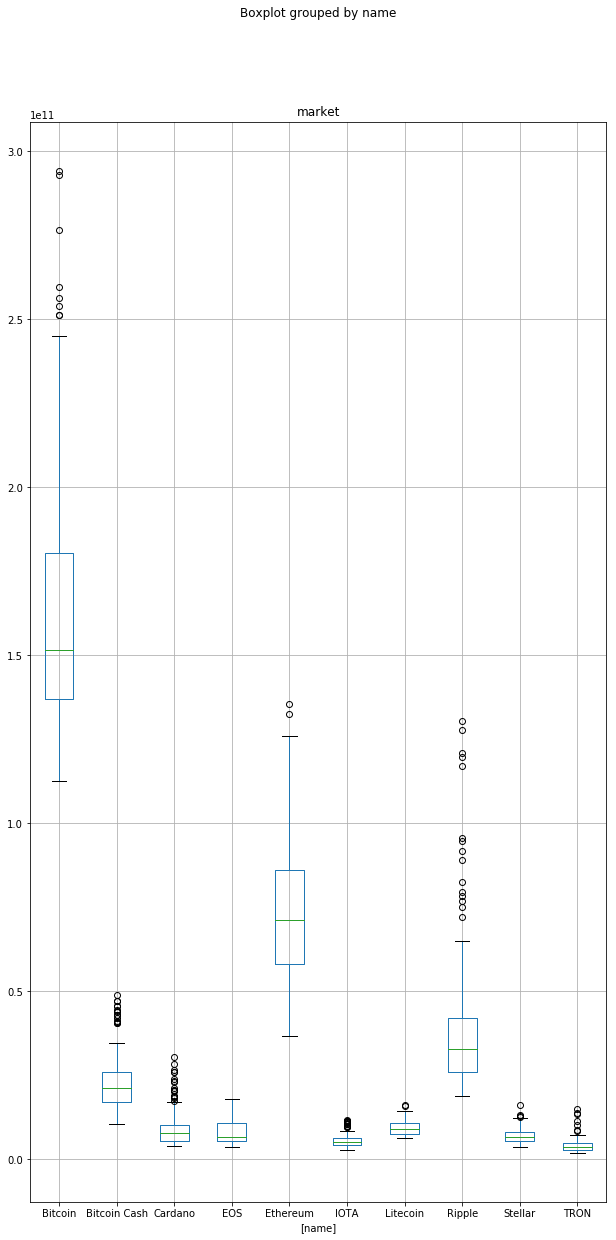

In [9]:
crp_spread = df[df['ranknow']<=10]
crp_spread = crp_spread[(['date', 'ranknow', 'name', 'market'])]
crp_spread = crp_spread[crp_spread['date']>='2018-01-01']
crp_spread = crp_spread.sort_values('ranknow')
crp_spread = crp_spread[['name', 'market']]
crp_spread.boxplot(by='name', figsize=(10,20))

The Boxplots above represent their market cap ranges for 2018. From a glance, we see that Bitcoin's range is far greater than any of the following coins. Despite having the highest median value, since it's range of historic market cap values are so large, it's difficult to predict how Bitcoin's value behave in the future.

Coins like IOTA and EOS, which have much smaller ranges, could be considered more trustworthy in the sense that we can have an accurate estimate the market cap value in future, based on its past values. EOS in particular doesn't have any outliers, so its data is much more reliable for making decisions than the other top coins.

In [10]:
crp_market = df[(['date', 'ranknow', 'name', 'spread'])]
crp_market = crp_market[(crp_market['date']>='2018-01-01')&(crp_market['ranknow']<=10)]
crp_market = crp_market[(['name', 'spread'])]
crp_market = crp_market.groupby('name', sort=False).describe()
crp_market

spread                                                          \
              count        mean         std     min     25%     50%     75%   
name                                                                          
Bitcoin       157.0  716.567197  527.402661  110.78  339.09  565.00  945.48   
Ethereum      157.0   70.600000   60.248049   13.24   31.39   46.90   89.51   
Ripple        157.0    0.128471    0.175664    0.01    0.04    0.06    0.13   
Bitcoin Cash  157.0  147.738790  121.147123   17.68   71.67  119.68  179.09   
EOS           157.0    1.363567    1.044681    0.16    0.70    1.02    1.72   
Litecoin      157.0   15.930955   12.483821    1.86    7.69   12.56   18.68   
Stellar       157.0    0.052102    0.054456    0.00    0.02    0.03    0.06   
Cardano       157.0    0.051019    0.062994    0.00    0.02    0.03    0.05   
IOTA          157.0    0.246115    0.196141    0.04    0.12    0.18    0.30   
TRON          157.0    0.011210    0.017663    0.00    0.00    0.01    0.01   

                       
                  max  
name                   
Bitcoin       3648.20  
Ethereum       417.09  
Ripple           1.29  
Bitcoin Cash   850.89  
EOS              5.17  
Litecoin        80.53  
Stellar          0.36  
Cardano          0.35  
IOTA             1.47  
TRON             0.12

We can compare how widely values vary for each coin by looking at their spread. As mentioned in the __Description of Data__ section, the spread of a coin refers to the difference between its highest and lowest price during open hours for that given day. 

Firstly, we notice that the spread itself has a lot of variability. The standard deviation of Bitcoin's spread is 527.40, which is nearly as high as the mean itself (716.57).

Second, the range of spread for Bitcoin is incredibly large as the lowest spread is 110.78 and the maximum being 3648.20. This shows that Bitcoin value can change quite a lot in one day.

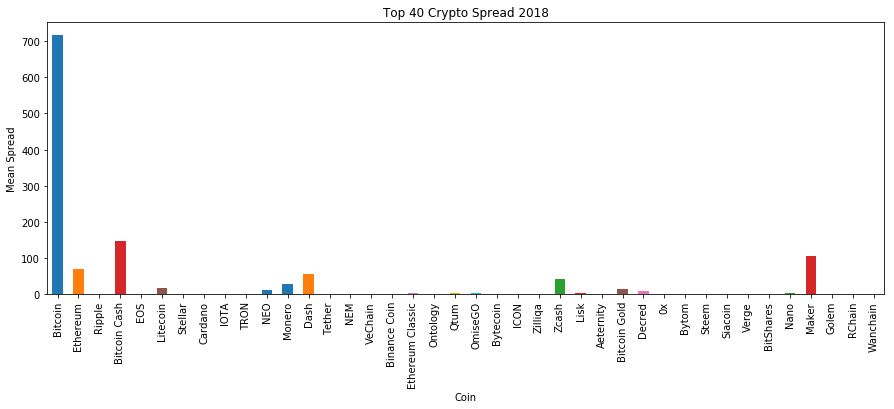

In [11]:
crp_spread = df[df['date']>='2018-01-01']
crp_spread = crp_spread[(['ranknow', 'name', 'spread'])]
crp_spread = crp_spread.groupby('name').mean()
crp_spread = crp_spread.sort_values('ranknow')
crp_spread = crp_spread['spread']

ax = crp_spread.head(40).plot(kind='bar', title='Top 40 Crypto Spread 2018', figsize=(15,5))
ax.set_xlabel("Coin")
ax.set_ylabel("Mean Spread")
plt.show()

The Bar plot above shows the mean "Spread" of each of the top 40 ranked coins in 2018 so that we can compare them visually. It's apparent that Bitcoin has the widest range of variability amongst the top 40 coins by a large margin.

Although Bitcoin is ranked the highest, we can conclude that its value is highly unstable and prone to a wide range of changes.

## Analytic Question

**_3.	Are there any relationships between different cryptocurrencies?_**

In [12]:
crp6 = df[df['ranknow']<=40]
crp6 = crp6[crp6['date']>='2018-01-01']

crp6 = crp6.pivot(index='date', columns='symbol', values='market')
crp6

symbol,ADA,AE,BCH,BCN,BNB,BTC,BTG,BTM,BTS,DASH,...,VEN,WAN,XEM,XLM,XMR,XRP,XVG,ZEC,ZIL,ZRX
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,1.863760e+10,3.081100e+08,4.280480e+10,1.081230e+09,8.544440e+08,2.367250e+11,4.379180e+09,352657000.0,1.731710e+09,8.207990e+09,...,6.364560e+08,NaN,9.315310e+09,6.436760e+09,5.434340e+09,8.894590e+10,3.195980e+09,1.502590e+09,NaN,4.296760e+08
2018-01-02 00:00:00+00:00,1.878870e+10,3.037430e+08,4.111480e+10,1.077120e+09,8.374310e+08,2.285790e+11,4.610460e+09,362684000.0,2.001140e+09,8.218420e+09,...,6.747240e+08,NaN,9.374970e+09,8.873700e+09,5.582210e+09,9.179180e+10,2.266240e+09,1.713990e+09,NaN,4.172860e+08
2018-01-03 00:00:00+00:00,2.021480e+10,3.212890e+08,4.561330e+10,1.165830e+09,8.683670e+08,2.513120e+11,4.622800e+09,375105000.0,2.069990e+09,9.422640e+09,...,7.228270e+08,NaN,1.033370e+10,1.005980e+10,5.953920e+09,9.545720e+10,2.089650e+09,1.727630e+09,NaN,4.286030e+08
2018-01-04 00:00:00+00:00,2.836490e+10,3.570500e+08,4.406910e+10,1.170310e+09,9.352700e+08,2.562500e+11,4.561520e+09,424843000.0,2.323760e+09,9.151080e+09,...,9.621750e+08,NaN,1.652030e+10,1.595360e+10,6.448110e+09,1.207630e+11,2.107470e+09,1.737200e+09,NaN,4.662940e+08
2018-01-05 00:00:00+00:00,3.036440e+10,4.204660e+08,4.055760e+10,1.272750e+09,9.055500e+08,2.597480e+11,4.598030e+09,503485000.0,2.186950e+09,9.527170e+09,...,1.046450e+09,NaN,1.519560e+10,1.321940e+10,6.262550e+09,1.278700e+11,2.312330e+09,1.764630e+09,NaN,4.969980e+08
2018-01-06 00:00:00+00:00,2.584930e+10,4.936960e+08,4.365320e+10,2.695910e+09,1.472230e+09,2.930910e+11,4.646530e+09,513012000.0,2.032970e+09,9.026110e+09,...,1.017310e+09,NaN,1.421670e+10,1.185400e+10,5.999260e+09,1.170330e+11,2.623240e+09,1.759870e+09,NaN,5.338130e+08
2018-01-07 00:00:00+00:00,2.655320e+10,5.713450e+08,4.705400e+10,3.050240e+09,2.254460e+09,2.942220e+11,5.018030e+09,575035000.0,2.150010e+09,9.881510e+09,...,1.314190e+09,NaN,1.489880e+10,1.268840e+10,7.103000e+09,1.198190e+11,2.542480e+09,2.269630e+09,NaN,6.648410e+08
2018-01-08 00:00:00+00:00,2.590970e+10,6.194980e+08,4.709160e+10,2.828190e+09,1.846270e+09,2.766120e+11,5.063530e+09,575429000.0,2.126430e+09,1.001620e+10,...,1.265540e+09,NaN,1.645400e+10,1.244210e+10,7.139010e+09,1.303020e+11,2.620880e+09,2.659820e+09,NaN,6.597290e+08
2018-01-09 00:00:00+00:00,2.328730e+10,5.681130e+08,4.077090e+10,2.396780e+09,1.799480e+09,2.539350e+11,4.005020e+09,543097000.0,1.997480e+09,8.476040e+09,...,1.176920e+09,NaN,1.504720e+10,1.122910e+10,6.289410e+09,9.465750e+10,2.573020e+09,2.090110e+09,NaN,9.155700e+08


The table above shows the market cap values of the top 40 coins grouped by date.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'BTC vs QTUM')

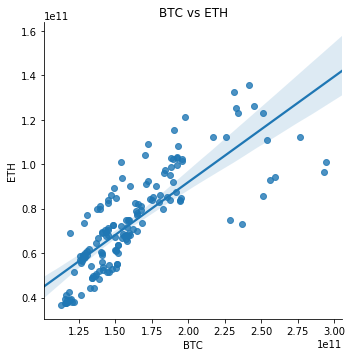

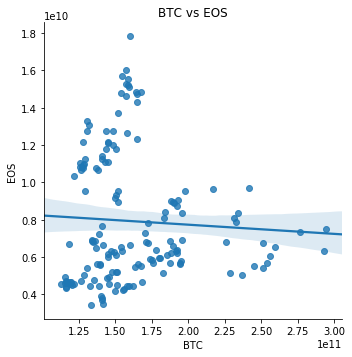

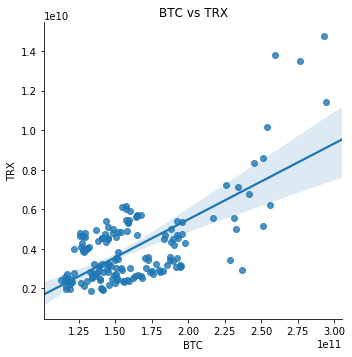

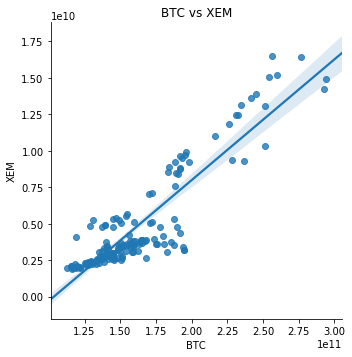

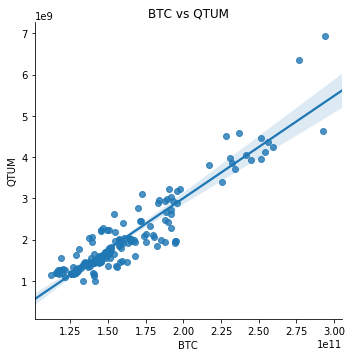

In [13]:
sns.lmplot(x='BTC',y='ETH',data=crp6,fit_reg=True) 
ax = plt.gca()
ax.set_title("BTC vs ETH")

sns.lmplot(x='BTC',y='EOS',data=crp6,fit_reg=True)
ax = plt.gca()
ax.set_title("BTC vs EOS")

sns.lmplot(x='BTC',y='TRX',data=crp6,fit_reg=True)
ax = plt.gca()
ax.set_title("BTC vs TRX")

sns.lmplot(x='BTC',y='XEM',data=crp6,fit_reg=True)
ax = plt.gca()
ax.set_title("BTC vs XEM")

sns.lmplot(x='BTC',y='QTUM',data=crp6,fit_reg=True)
ax = plt.gca()
ax.set_title("BTC vs QTUM")

The scatter plots above compares the market capitalization values of Bitcoin with 5 different coins; Ethereum, EOS, Tron, Nem and Qtum. These specific coins were chosen by taking the interval at every 5 rankings up to 25 i.e. rank 5 is Ethereum, rank 10 is EOS and so on. Because only a few coins were selected for these comparisons, they are not representative of the entire population of cryptocurrencies in the dataset.

In this case, we've kept Bitcoin as a constant, so we can compare its Market Cap with other cryptocurrencies and see if there are any correlations. Although none of the plots show a deterministic correlation, some correlation does exist in each of the graphs, except for "Bitcoin vs. EOS". "Bitcoin vs Qtum" shows almost a linear relationship as does "Bitcoin vs. Ethereum". 

In each of these graphs (besides "Bitcoin vs. EOS"), we get the impression that as the value of certain cryptocurrency increases, Bitcoin's value increases and vice versa. This tells us that observing the Bitcoin market can possibly give us information on how these specific coin markets are doing as well.

## Proposition for Further Research

Firstly, for my third analytical question, I tried to investigate the correlation of market cap values between Bitcoin and some other different cryptocurrencies. However, my sampling method wasn't thorough because it would be too difficult to compare all the cryptocurrencies available. So, for the future, it may be interesting to research the correlation between different coins with a more representative sample. This way we can make proper conlusions on the relationships between the different markets. To do this, we can apply different correlation methods such as the Pearson correlation, Spearmans correlation, etc. to see what kind of correlations we have. Furthermore, we can apply more profound coding techniques to randomly sample, and compare different combinations of different cryptocurrencies so that the sample is more representative.

Lastly, I believe it would be useful to research the trends of cryptocurrencies further and develop a method to predict future trends. In markets like cryptocurrency, it's nearly impossible to predict their future behavior because they tend to behave randomly. But if we can estimate trends of market caps then we can predict which coins are likely to increase in value, become more popular, and "rise in the ranks" of cyrptocurrencies. For this project, we would apply different forecasting models to a sample of the data and see which methods we can use to make better predictions.